In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import StandardScaler 
import numpy as np

In [2]:
data = pd.read_csv("jfk_weather_cleaned.csv")

In [3]:
data.head()

,DATE,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
0,01-01-2010 00:51,6.0,33,32,31,92,0,0,29.97,29.99,0.01
1,01-01-2010 01:51,6.0,33,33,32,96,0,0,29.97,29.99,0.02
2,01-01-2010 02:51,5.0,33,33,32,96,0,0,29.97,29.99,0.02
3,01-01-2010 03:51,5.0,33,33,32,96,0,0,29.95,29.97,0.02
4,01-01-2010 04:51,5.0,33,32,31,92,0,0,29.93,29.96,0.02


In [4]:
data.isna().sum()

DATE                0
VISIBILITY          0
DRYBULBTEMPF        0
WETBULBTEMPF        0
DewPointTempF       0
RelativeHumidity    0
WindSpeed           0
WindDirection       0
StationPressure     0
SeaLevelPressure    0
Precip              0
dtype: int64

In [5]:
data.describe()

,VISIBILITY,DRYBULBTEMPF,WETBULBTEMPF,DewPointTempF,RelativeHumidity,WindSpeed,WindDirection,StationPressure,SeaLevelPressure,Precip
count,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000,75083.000000
mean,9.211896,55.355527,49.327544,42.424024,64.812075,11.253240,196.550751,30.005579,30.026049,0.005478
std,2.202311,17.394334,16.182867,19.577957,19.898962,6.101048,107.692804,0.235172,0.234069,0.036161
min,0.000000,1.000000,-1.000000,-19.000000,8.000000,0.000000,0.000000,28.520000,28.540000,0.000000
25%,10.000000,42.000000,36.000000,27.000000,49.000000,7.000000,110.000000,29.860000,29.880000,0.000000
50%,10.000000,56.000000,50.000000,44.000000,66.000000,10.000000,200.000000,30.000000,30.020000,0.000000
75%,10.000000,70.000000,64.000000,59.000000,82.000000,15.000000,290.000000,30.150000,30.170000,0.000000
max,14.000000,102.000000,85.000000,84.000000,100.000000,53.000000,360.000000,30.830000,30.850000,2.410000


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

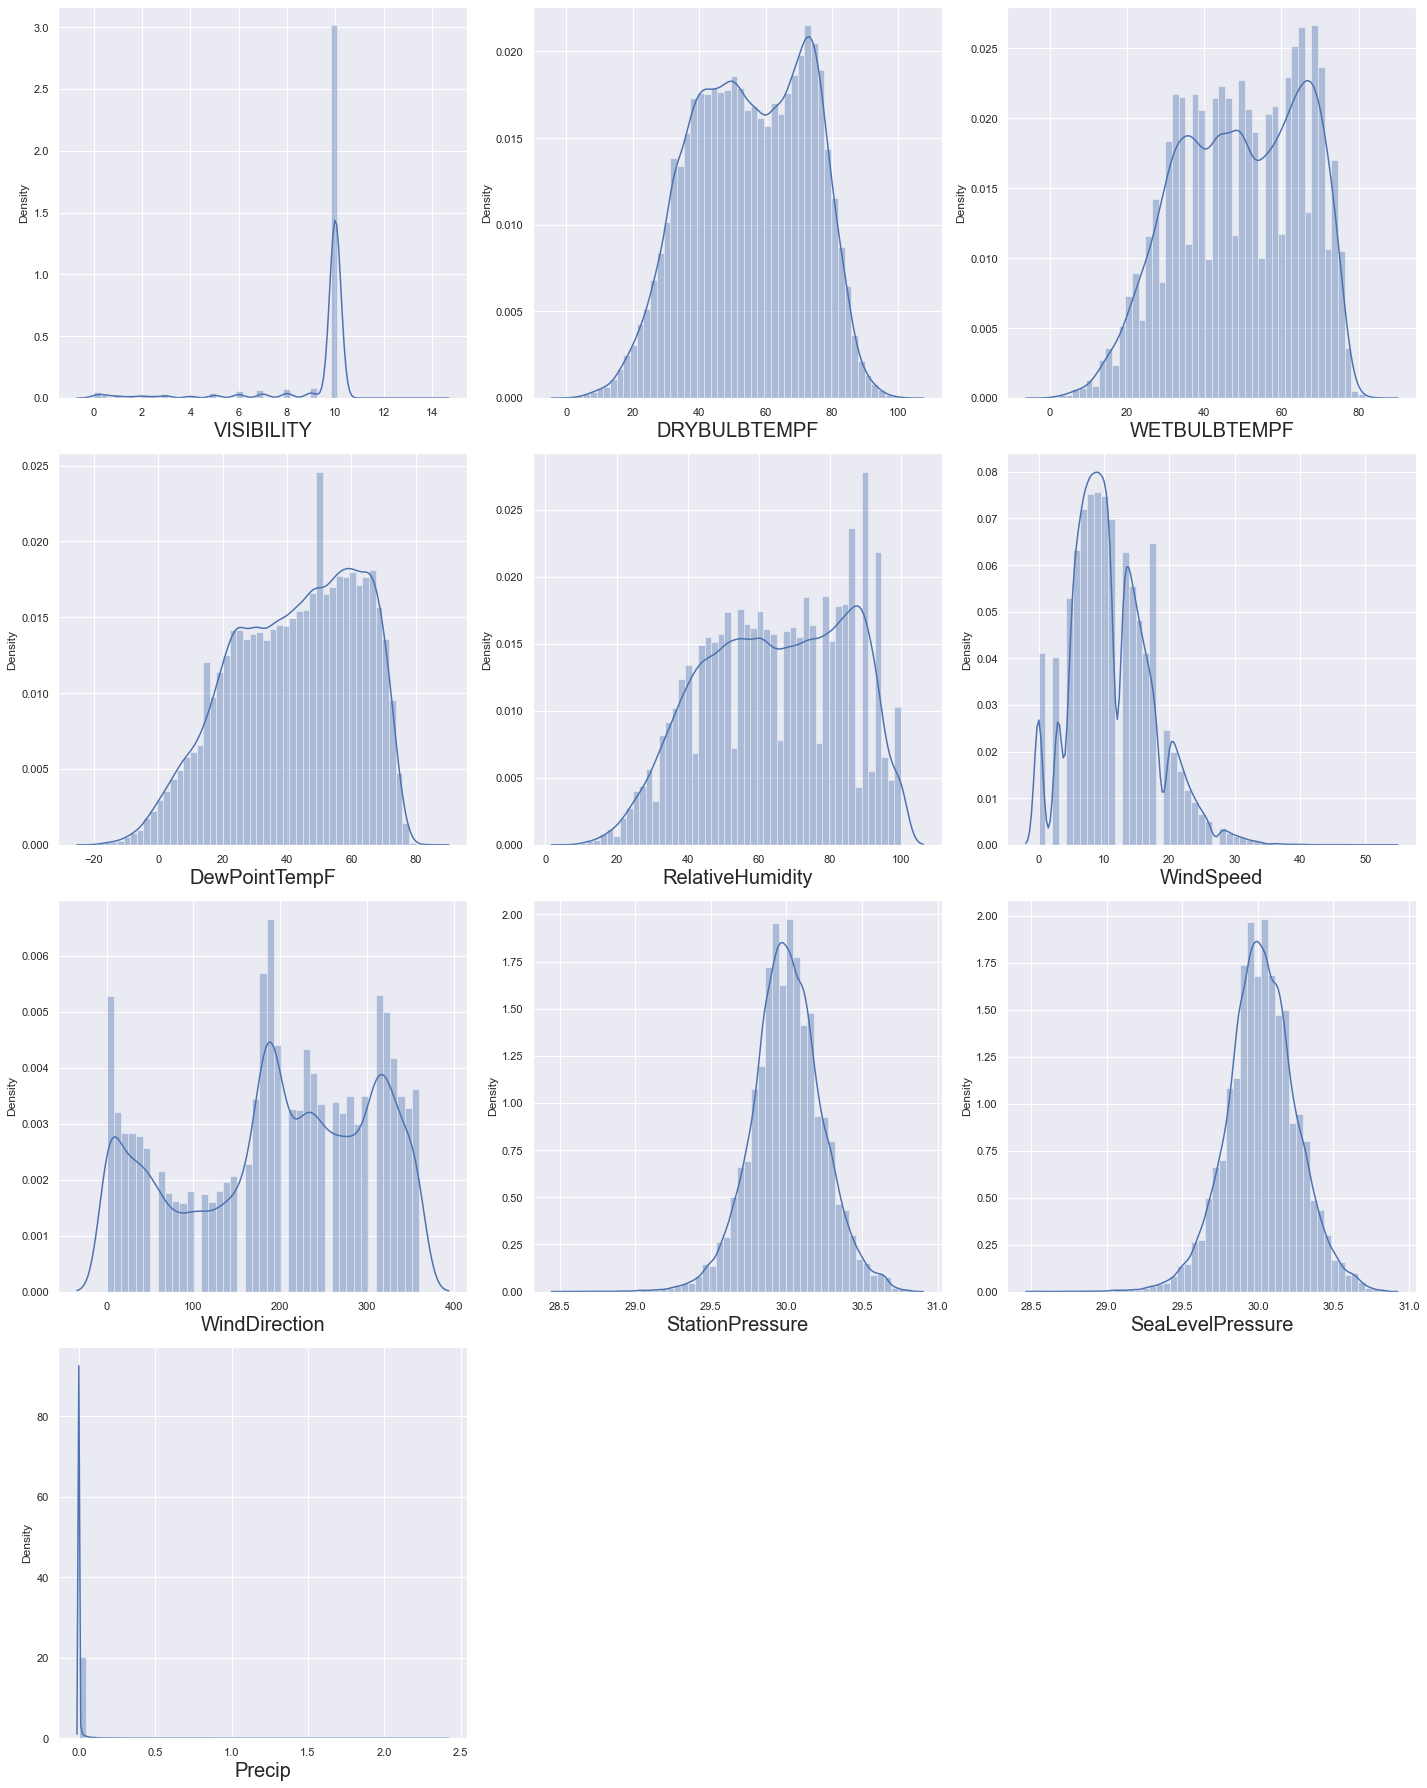

In [6]:
# to check data distribution
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data.drop(['DATE'],axis=1):
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [7]:
# scale our data
scale = StandardScaler()

In [8]:
X = data.drop(['DATE','VISIBILITY'],axis=1)
y = data['VISIBILITY']

In [9]:
X_scaled = scale.fit_transform(X)

In [10]:
type(X_scaled)

numpy.ndarray

In [11]:
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

In [12]:
type(X_scaled)

pandas.core.frame.DataFrame

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

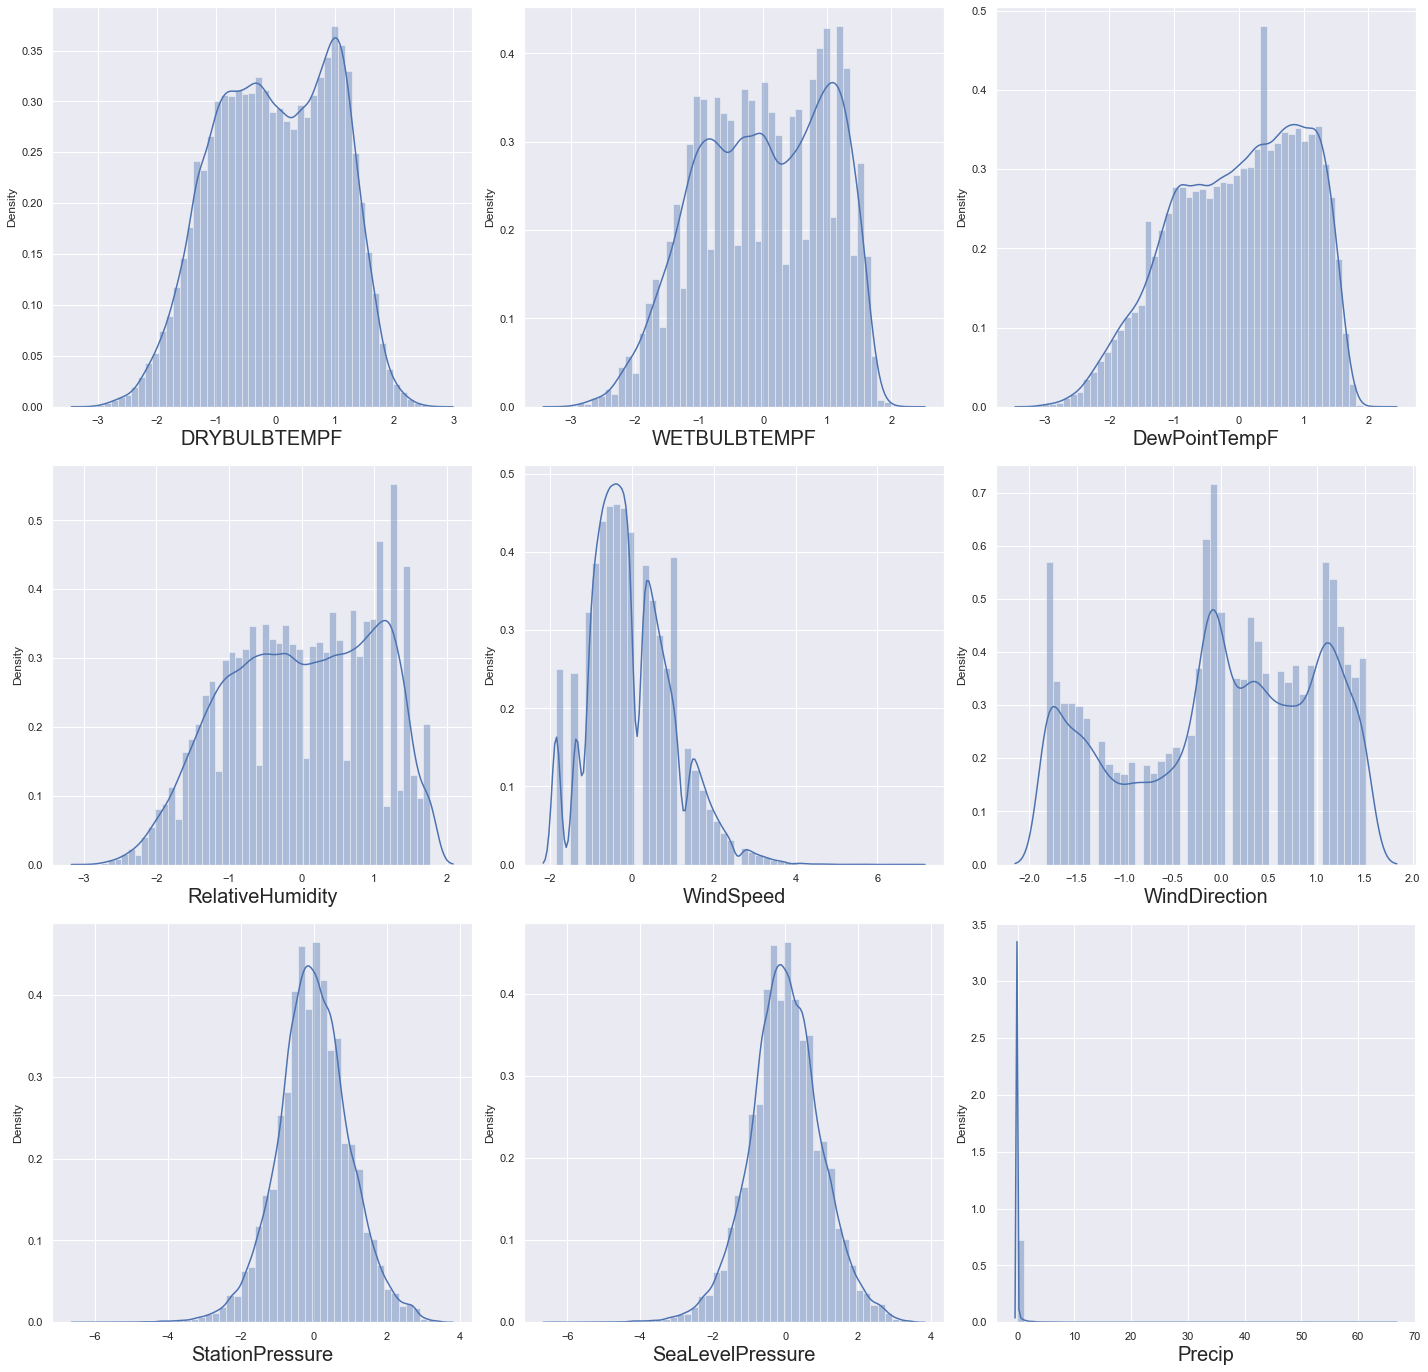

In [13]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X_scaled:
    ax = plt.subplot(4,3,plotnumber)
    sns.distplot(X_scaled[column])
    plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

We can see some columns are not following normal distribution.

we will use such algorithms which do not require normal distribution such as decision tree and XGBoost.

Also, precipitation column has most of data value near 0. It won't be very useful for our analysis. 
Let's drop this column.

Let's check correlation between the columns :

<AxesSubplot:>

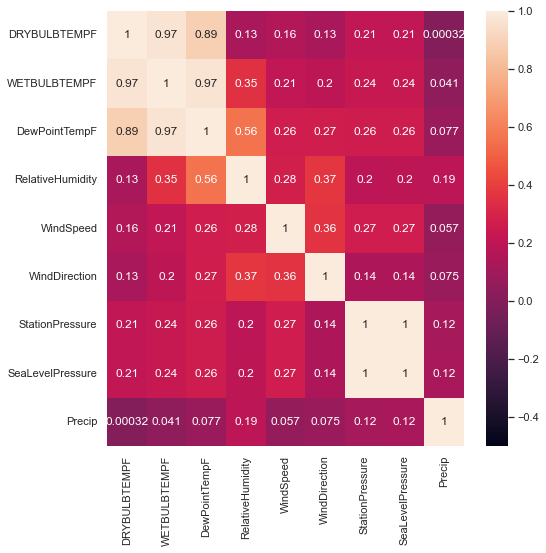

In [14]:
plt.figure(figsize=(8,8))
plt_data =X

sns.heatmap(plt_data.corr().abs(), vmin = -0.5,vmax = 1,annot=True)

There is clear correaltion between some columns.

Let's drop the columns with high correlaion.

In [15]:
X_new = X.drop(['WETBULBTEMPF','DewPointTempF','StationPressure'],axis=1)

<AxesSubplot:>

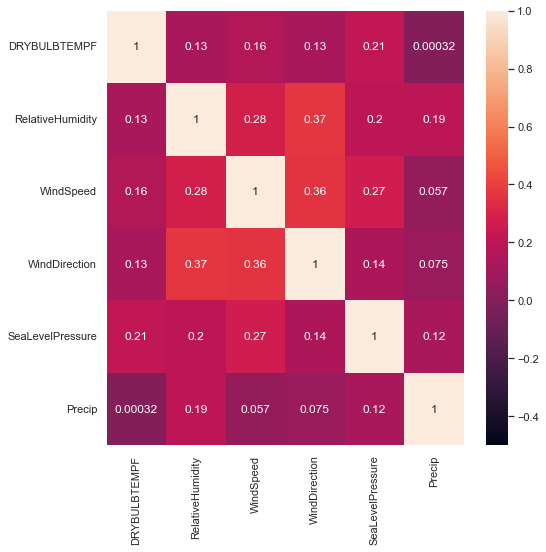

In [16]:
plt.figure(figsize=(8,8))
plt_data =X_new

sns.heatmap(plt_data.corr().abs(), vmin = -0.5,vmax = 1,annot=True)

In [18]:
X_new=X_new.drop(['Precip'],axis=1)

In [19]:
X_new.shape

(75083, 5)

In [20]:
X_new.head(5)

,DRYBULBTEMPF,RelativeHumidity,WindSpeed,WindDirection,SeaLevelPressure
0,33,92,0,0,29.99
1,33,96,0,0,29.99
2,33,96,0,0,29.99
3,33,96,0,0,29.97
4,33,92,0,0,29.96


We can go for model training now